### Hito4 para Determinantes del ingreso
*"Modelación donde se implementará una solución analítica que aumente las métricas de desempeño. Se solicitan por lo menos 3 modelos predictivos, donde deberán reportar las principales métricas. Cada modelo predictivo debe tener una reseña sobre el por qué se diseñó de esa forma.."*

####  Carga de librerias e importación de .csv obtenido en el hito anterior

In [22]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, classification_report 

#from graficos import *
import funciones as fun

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn') # Gráficos estilo seaborn
plt.rcParams["figure.figsize"] = (8,6) # Tamaño gráficos (5, 3)
plt.rcParams["figure.dpi"] = 75 # resolución gráficos 100

In [23]:
df = pd.read_csv('income_mod.csv')
print(df.shape)
df.head()

(46033, 23)


,age,fnlwgt,educational_num,capital_gain,capital_loss,hours_per_week,income,workclass_recod_private,workclass_recod_self_employed,workclass_recod_state_level_gov,...,collars_white_collar,relationship_Not_in_family,relationship_Other_relative,relationship_Own_child,relationship_Unmarried,relationship_Wife,race_Asian_Pac_Islander,race_White,gender_Male,region_Unknown
0,25,226802,7,0,0,40,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,38,89814,9,0,0,50,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
2,28,336951,12,0,0,40,1,0,0,1,...,0,0,0,0,0,0,0,1,1,0
3,44,160323,10,7688,0,40,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,34,198693,6,0,0,30,0,1,0,0,...,0,1,0,0,0,0,0,1,1,0


###  Modelación predictiva

- Se generarán 3 modelos.
- Se realizaran predicciones con la funcion predict().
- Se ajustara el modelo, se analizará la curva roc.

####  Modelo 1:

In [24]:
# Utilización predict() para predicción
modelo_1, y_test, y_hat = fun.predict_(df, var_obj='income')
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90     11487
           1       0.71      0.59      0.64      3704

    accuracy                           0.84     15191
   macro avg       0.79      0.76      0.77     15191
weighted avg       0.83      0.84      0.84     15191



Text(0.5, 0, 'Falsos Positivos (FP)')

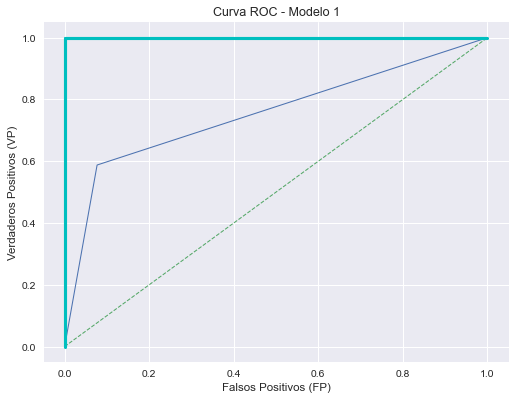

In [25]:
# Generación de curva roc
false_positive, true_positive, threshold = roc_curve(y_test, y_hat)

plt.title('Curva ROC - Modelo 1')
plt.plot(false_positive, true_positive, lw=1)
plt.plot([0, 1], ls="--", lw=1)
plt.plot([0, 0], [1, 0] , c='c', lw=3), plt.plot([1, 1], c='c', lw=3)
plt.ylabel('Verdaderos Positivos (VP)')
plt.xlabel('Falsos Positivos (FP)')

#### Analisis de resultados Modelo 1:

- El f1-score indica que este modelo predice una certeza aleatoria, esto debido a que para ambos casos el f1-score es mayor a 50% (90% para 0, y 64% para 1).
- La métrica de precision, nos indica que el modelo muestra de buena forma los sueldos sobre 50k, donde supera el 71% para ambas clases.
- Recall tiene una gran certeza en predecir sueldos menores o iguales a 50k con un porcentaje superior a 90%, y no es tan efectivo con los mayores a 50k (59%).
- La curva ROC nos indica que la detección de VP es superior a la de FP, esto se aprecia como una "curva" sobre la bisectriz.